In [8]:
from google.colab import drive
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
# 27/03/2024
# CSC354 – Assignmen2 – ML – Decision Trees
# MUHAMMAD MIKAAL AMJAD
# FA21-BSE-143
# We were provided with a dataset, the dataset was about car prices and we have to find the best model using the decision trees and random forest, by variation of parameters and dropping of data
#drive.mount("/content/drive")
#The link https://colab.research.google.com/drive/1o5ic2d6xLhF9QlNvRbkjcBg5H20S7_2Z?usp=sharing

In [14]:
import pandas as pd
path="/content/drive/MyDrive/Dataset/cars-dataset.csv"
data=pd.read_csv(path)
data

,year,km_driven,fuel,seller_type,transmission,owner,selling_price
0,2007,70000,Petrol,Individual,Manual,First Owner,60000
1,2007,50000,Petrol,Individual,Manual,First Owner,135000
2,2012,100000,Diesel,Individual,Manual,First Owner,600000
3,2017,46000,Petrol,Individual,Manual,First Owner,250000
4,2014,141000,Diesel,Individual,Manual,Second Owner,450000
...,...,...,...,...,...,...,...
4335,2014,80000,Diesel,Individual,Manual,Second Owner,409999
4336,2014,80000,Diesel,Individual,Manual,Second Owner,409999
4337,2009,83000,Petrol,Individual,Manual,Second Owner,110000
4338,2016,90000,Diesel,Individual,Manual,First Owner,865000


In [19]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
label_encoder = LabelEncoder()
print(data)
data=data.dropna()
for column in data.columns:
    if data[column].dtype == 'object':
        data[column] = label_encoder.fit_transform(data[column])

# Now, data contains numerical labels for string attributes
print(data.head())
print(data)


X = data.drop('selling_price', axis=1)  # Features
y = data['selling_price']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

      year  km_driven  fuel  seller_type  transmission  selling_price
0     2007      70000     4            1             1          60000
1     2007      50000     4            1             1         135000
2     2012     100000     1            1             1         600000
3     2017      46000     4            1             1         250000
4     2014     141000     1            1             1         450000
...    ...        ...   ...          ...           ...            ...
4335  2014      80000     1            1             1         409999
4336  2014      80000     1            1             1         409999
4337  2009      83000     4            1             1         110000
4338  2016      90000     1            1             1         865000
4339  2016      40000     4            1             1         225000

[4340 rows x 6 columns]
   year  km_driven  fuel  seller_type  transmission  selling_price
0  2007      70000     4            1             1          60000
1

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 109006644437.49913


In [ ]:
regressor = DecisionTreeRegressor(max_depth=3)
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 104802967402.42651


        Feature  Importance
0          year    0.141010
1     km_driven    0.142853
2          fuel    0.203029
3   seller_type    0.000000
4  transmission    0.513108
5         owner    0.000000


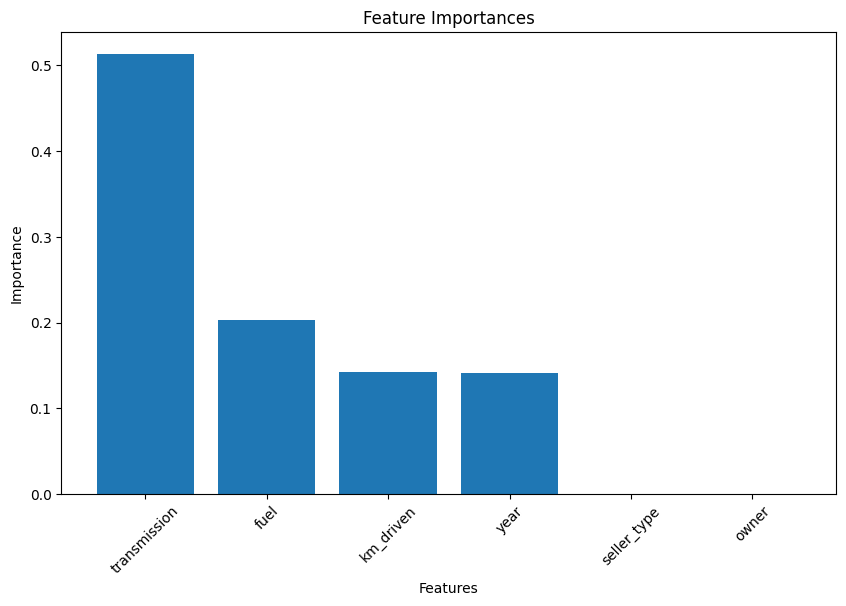

Feature with the least contribution: owner


In [ ]:
#Feature Contribution
importances = regressor.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(importance_df)

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()
least_contributing_feature = importance_df.iloc[-1]['Feature']
print("Feature with the least contribution:", least_contributing_feature)

In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the testing data using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate the MSE of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best MSE:", mse)
best_regressor = DecisionTreeRegressor(**best_params)
best_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

Best Parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10}
Best MSE: 85886556818.41817
Mean Squared Error: 85886556818.41817


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2],
    'max_leaf_nodes': [None, 10, 20, 30]
}

# Create a Decision Tree Regressor
regressor = DecisionTreeRegressor()

# Perform grid search using GridSearchCV
grid_search = GridSearchCV(regressor, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions on the testing data using the best estimator
y_pred = best_estimator.predict(X_test)

# Calculate the MSE of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Best Parameters:", best_params)
print("Best MSE:", mse)


Fitting 5 folds for each of 7776 candidates, totalling 38880 fits


Streaming output truncated to the last 5000 lines.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly se

Best Parameters: {'criterion': 'friedman_mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': 20, 'min_samples_leaf': 4, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'splitter': 'best'}
Best MSE: 95617206609.74843


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan ... nan nan nan]
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
best_regressor = DecisionTreeRegressor(**best_params)
best_regressor.fit(X_train, y_train)
y_pred = best_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 95617206609.74843


/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
#Random Forest
rf_regressor = RandomForestRegressor()

# Train the regressor on the training data
rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 73075221663.76144


        Feature  Importance
0          year    0.236479
1     km_driven    0.273748
2          fuel    0.121639
3   seller_type    0.056713
4  transmission    0.291663
5         owner    0.019759


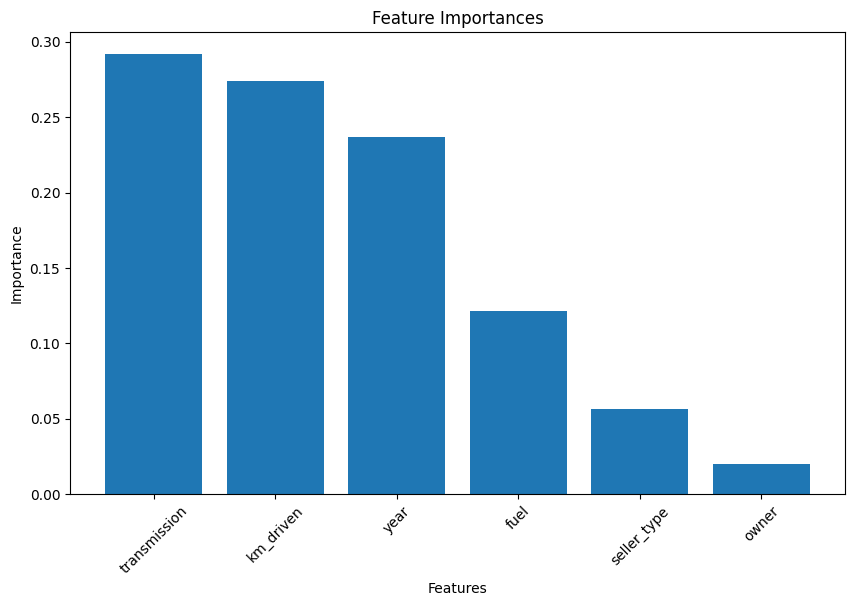

Feature with the least contribution: owner


In [ ]:
importances = rf_regressor.feature_importances_
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(importance_df)

importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()
least_contributing_feature = importance_df.iloc[-1]['Feature']
print("Feature with the least contribution:", least_contributing_feature)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],        # Number of trees in the forest
    'max_features': ['auto', 'sqrt'],      # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],       # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],         # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]             # Whether bootstrap samples are used when building trees
}
rf_regressor = RandomForestRegressor(random_state=42)

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params, random_state=42)
best_rf_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = best_rf_regressor.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Best Hyperparameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error: 66660092172.216064


In [16]:
data2=data
data2.drop(columns=['owner'],inplace=True)
print(data2)
X = data2.drop('selling_price', axis=1)  # Features
y = data2['selling_price']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

      year  km_driven  fuel  seller_type  transmission  selling_price
0     2007      70000     4            1             1          60000
1     2007      50000     4            1             1         135000
2     2012     100000     1            1             1         600000
3     2017      46000     4            1             1         250000
4     2014     141000     1            1             1         450000
...    ...        ...   ...          ...           ...            ...
4335  2014      80000     1            1             1         409999
4336  2014      80000     1            1             1         409999
4337  2009      83000     4            1             1         110000
4338  2016      90000     1            1             1         865000
4339  2016      40000     4            1             1         225000

[4340 rows x 6 columns]
Mean Squared Error: 203464527554.2972


So it can be clearly seen that after removing the Feature of owner, the results have changed radpidly.